This notebook iterates over the run_sampler module five times to achieve a more accurate result. Each iteration has 30k steps, saves the chain every 30k steps, and plots the cornerplots for each batch. The goal here is to run the Orbitize! MCMC algorithm through our test data represending well-constrainted orbits. Next, we'll test the OFTI algorithm with orbits with less constraint.

In [1]:
import numpy as np
import sampler
import driver
import kepler
import system
import results
import multiprocessing as mp
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import corner

In [2]:
params_list = pd.read_csv('/Users/rtejada/Desktop/orbitize_mcmc/test_params.csv',
                          header=None,names=['m0','m1','P','ecc','argp','lan','inc','tperi','plx','gamma','sigma'])
params_list

m0        m1            P       ecc      argp       lan       inc  \
0  2.732812  0.296382  5723.547292  0.181849  4.878873  1.049311  0.702022   
1  1.910946  0.250833  6863.710697  0.809880  4.617912  0.423327  0.215450   
2  1.968237  0.089138   673.974271  0.131954  1.815709  1.398987  0.583262   
3  1.474015  0.016697  1098.835142  0.493135  0.054974  4.474184  1.329829   
4  2.775147  0.103769  2464.492220  0.232713  3.325733  0.345529  0.649586   

   tperi        plx      gamma      sigma  
0  500.0  60.804643  66.415148  16.497966  
1  500.0  46.896846  14.391493  12.378026  
2  500.0  80.677309  77.534799  17.544266  
3  500.0  92.194087  26.168264   4.383070  
4  500.0  93.300829  29.514289  17.693520

In [3]:
def tau0(Tp,ref_epoch,P):
    return (Tp - ref_epoch)/P

def p2sma(P,m0,m1):
    return ((P/365.25)**2*(m0+m1))**(1/3)

In [4]:
tau1 = tau0(params_list.values[1][7],0.0,params_list.values[1][2])
sma1 = p2sma(params_list.values[1][2],params_list.values[1][0],params_list.values[1][1])

tau2 = tau0(params_list.values[2][7],0.0,params_list.values[2][2])
sma2 = p2sma(params_list.values[2][2],params_list.values[2][0],params_list.values[1][1])

print(tau2)
print(sma2)

0.7418680829181203
1.9622712848187405


In [5]:
# MCMC parameters
num_temps = 15
num_walkers = 50
num_threads = mp.cpu_count() # or a different number if you prefer

myDriver = driver.Driver('/Users/rtejada/orbitize/tests/testdata2.csv', # path to data file
                                  sampler_str='MCMC', # name of algorithm for orbit-fitting
                                  num_secondary_bodies=1, # number of secondary bodies in system
                                  system_mass=2.0, # total system mass [M_sun]
                                  plx=81, # total parallax of system [mas]
                                  mass_err=0.05, # mass error [M_sun]
                                  plx_err=1.0, # parallax error [mas]
                                  system_kwargs = {'fit_secondary_mass':True,
                                  'tau_ref_epoch':0, 'gamma_bounds':(-100, 200), 'jitter_bounds':(1e-3, 50)},
                                  mcmc_kwargs={'num_temps': num_temps, 'num_walkers': num_walkers,
                                  'num_threads': num_threads})

total_orbits = 100000 # number of steps x number of walkers (at lowest temperature)
burn_steps = 1000 # steps to burn in per walker
thin = 10# only save every 2nd step

Burn in complete


/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.

2000/2000 steps completed
Run complete
(15, 50, 200, 11)


Burn in complete


/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.si

2000/2000 steps completed
Run complete
(15, 50, 200, 11)


Burn in complete


/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.si

2000/2000 steps completed
Run complete
(15, 50, 200, 11)


Burn in complete


/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.si

2000/2000 steps completed
Run complete
(15, 50, 200, 11)


Burn in complete


/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/rtejada/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.si

2000/2000 steps completed
Run complete
(15, 50, 200, 11)


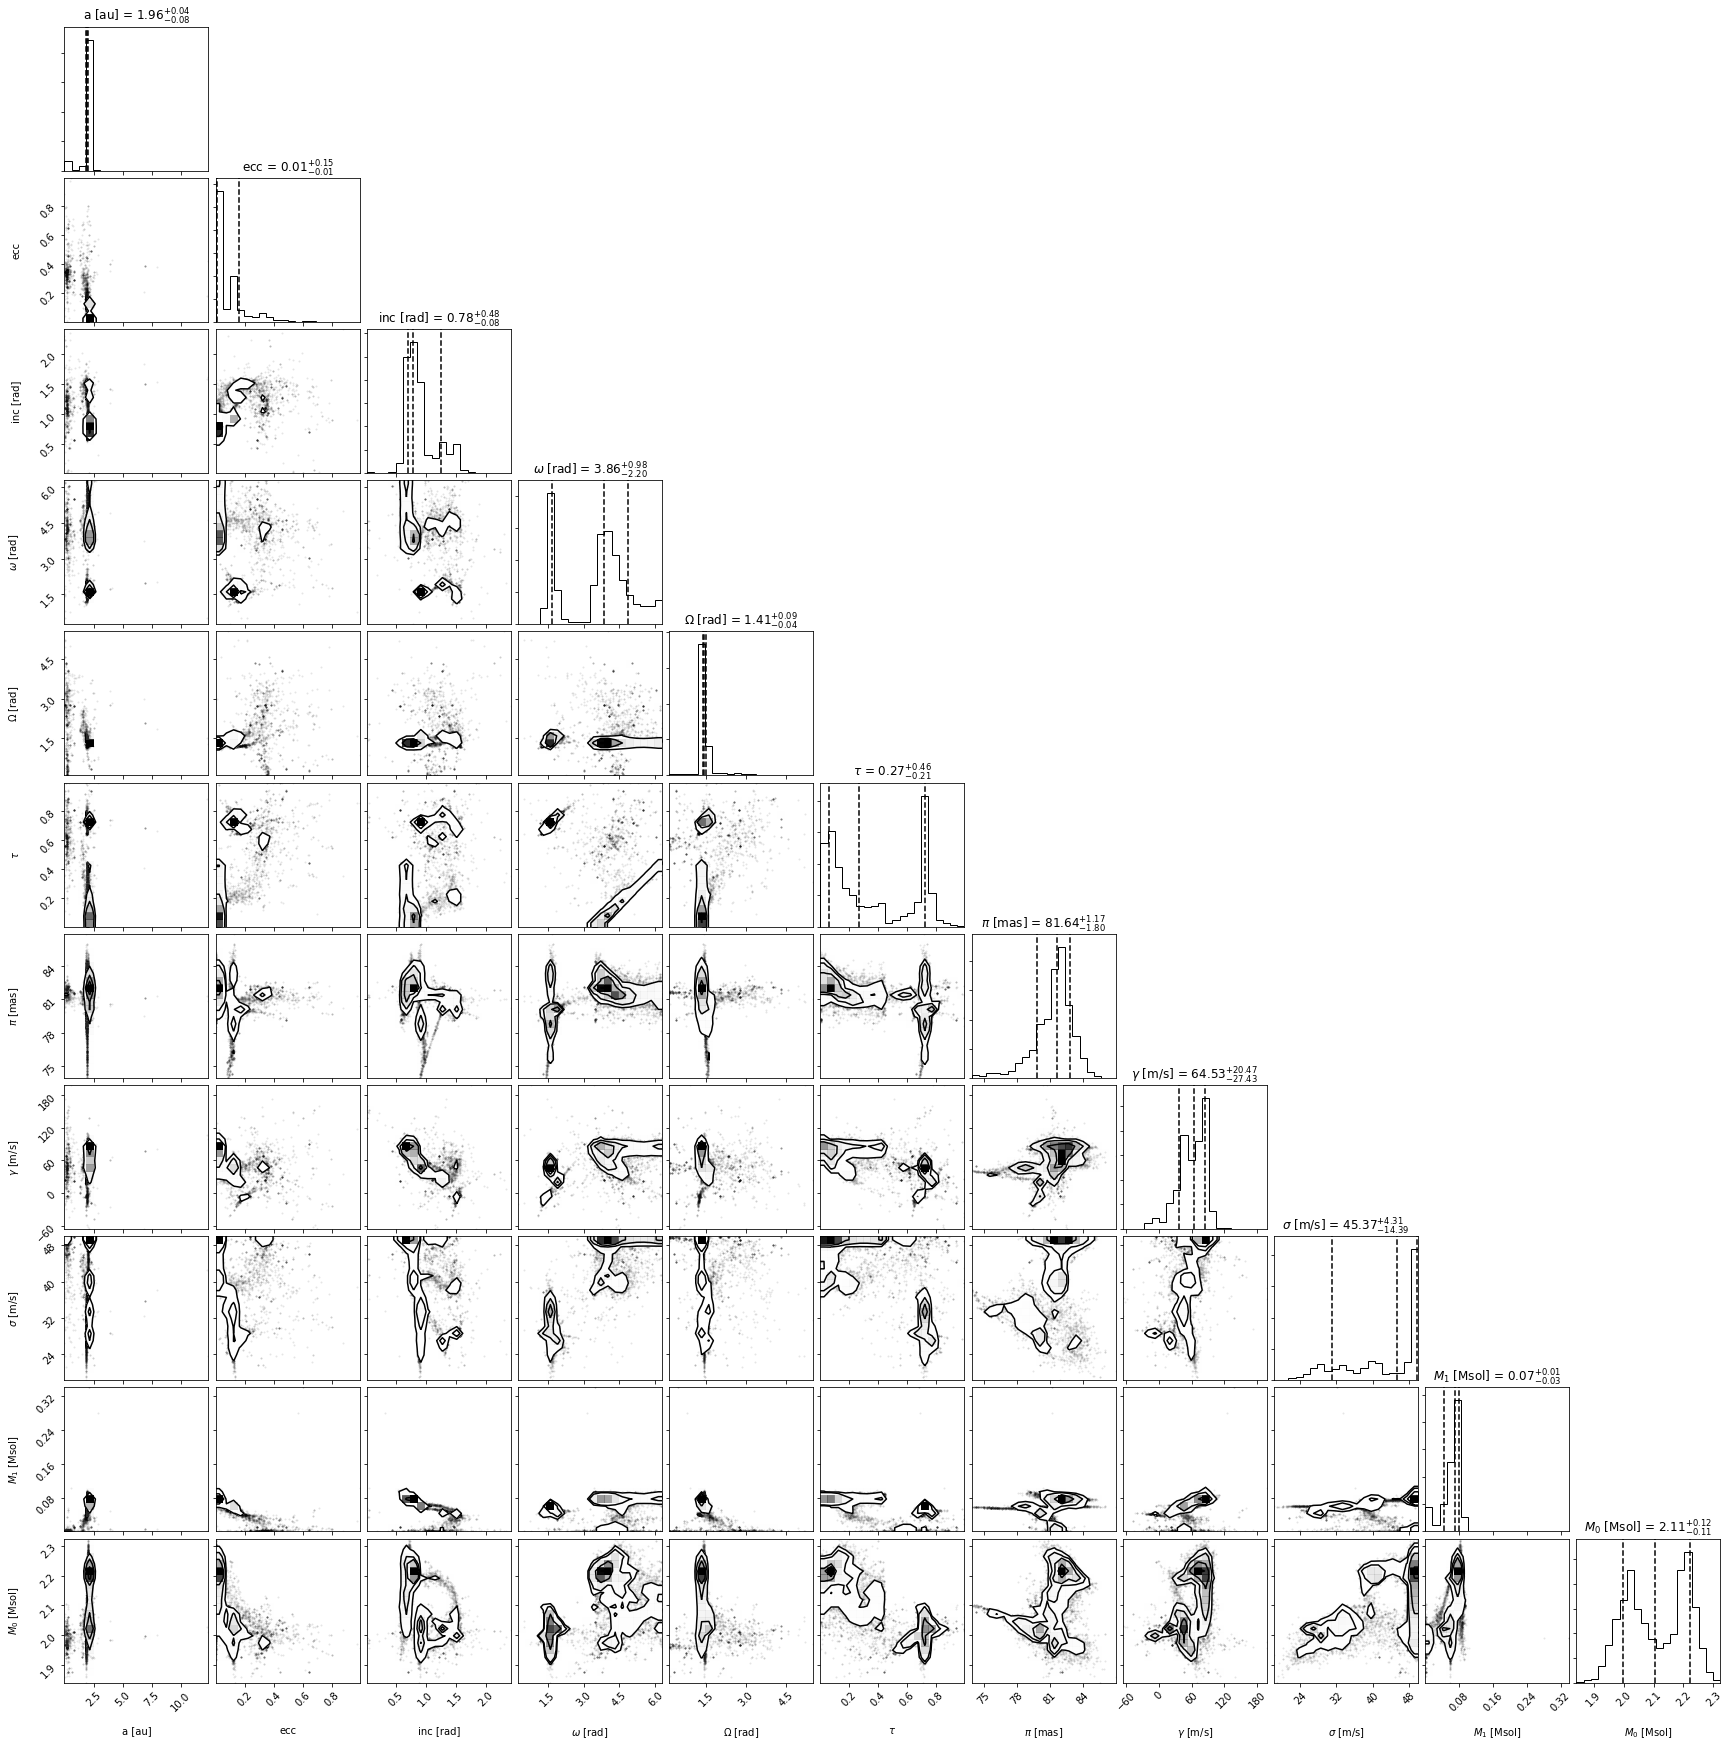

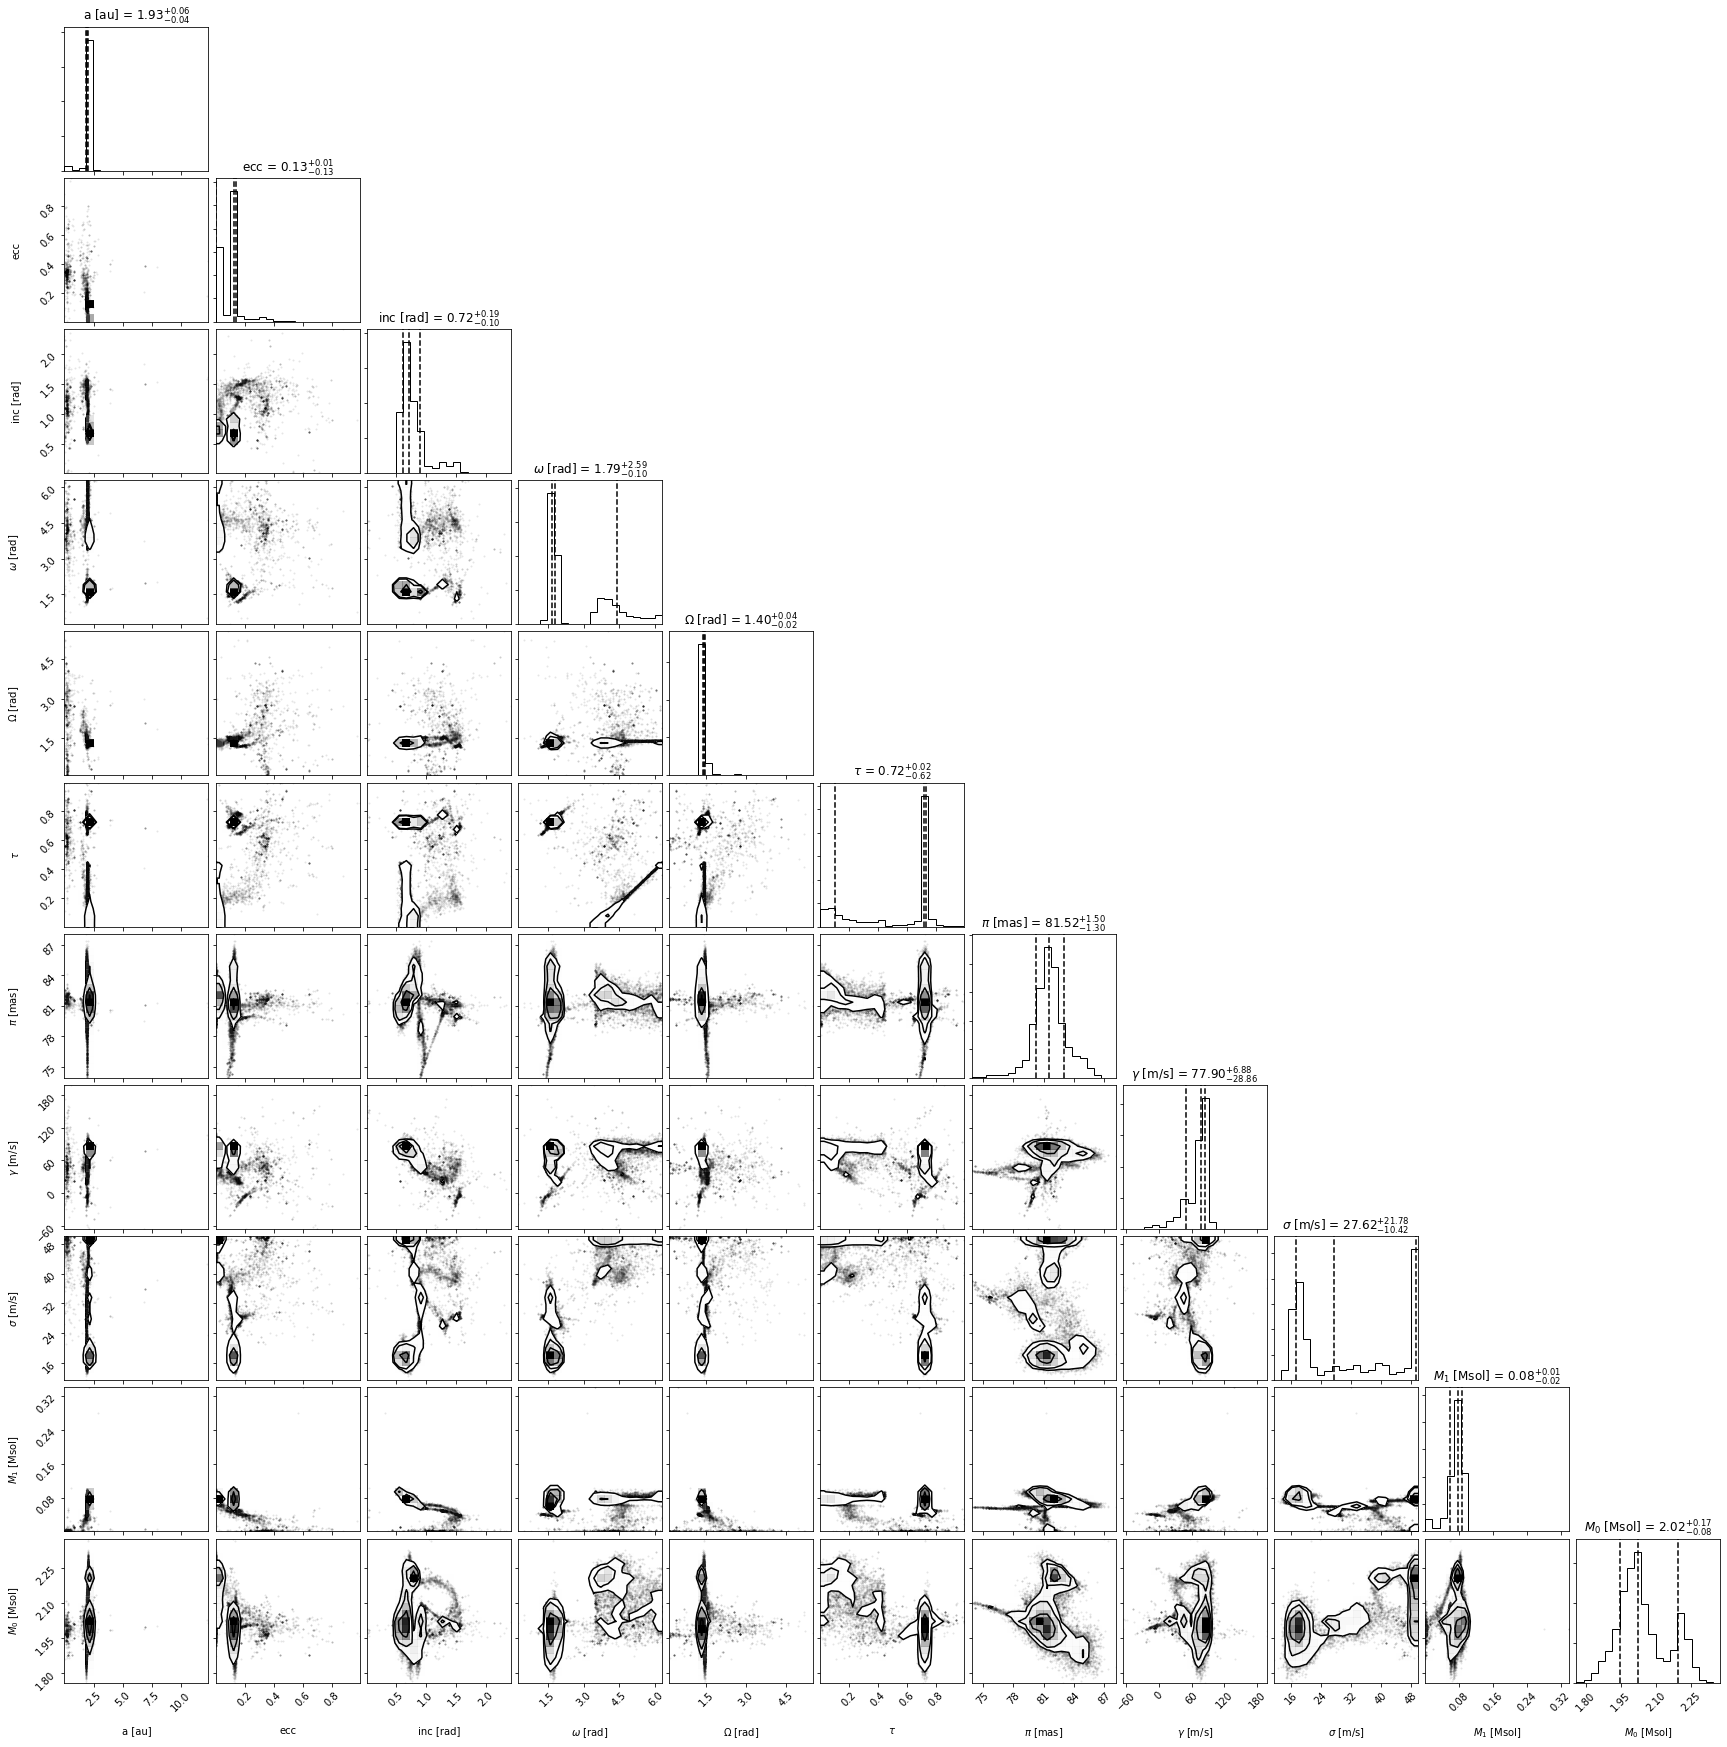

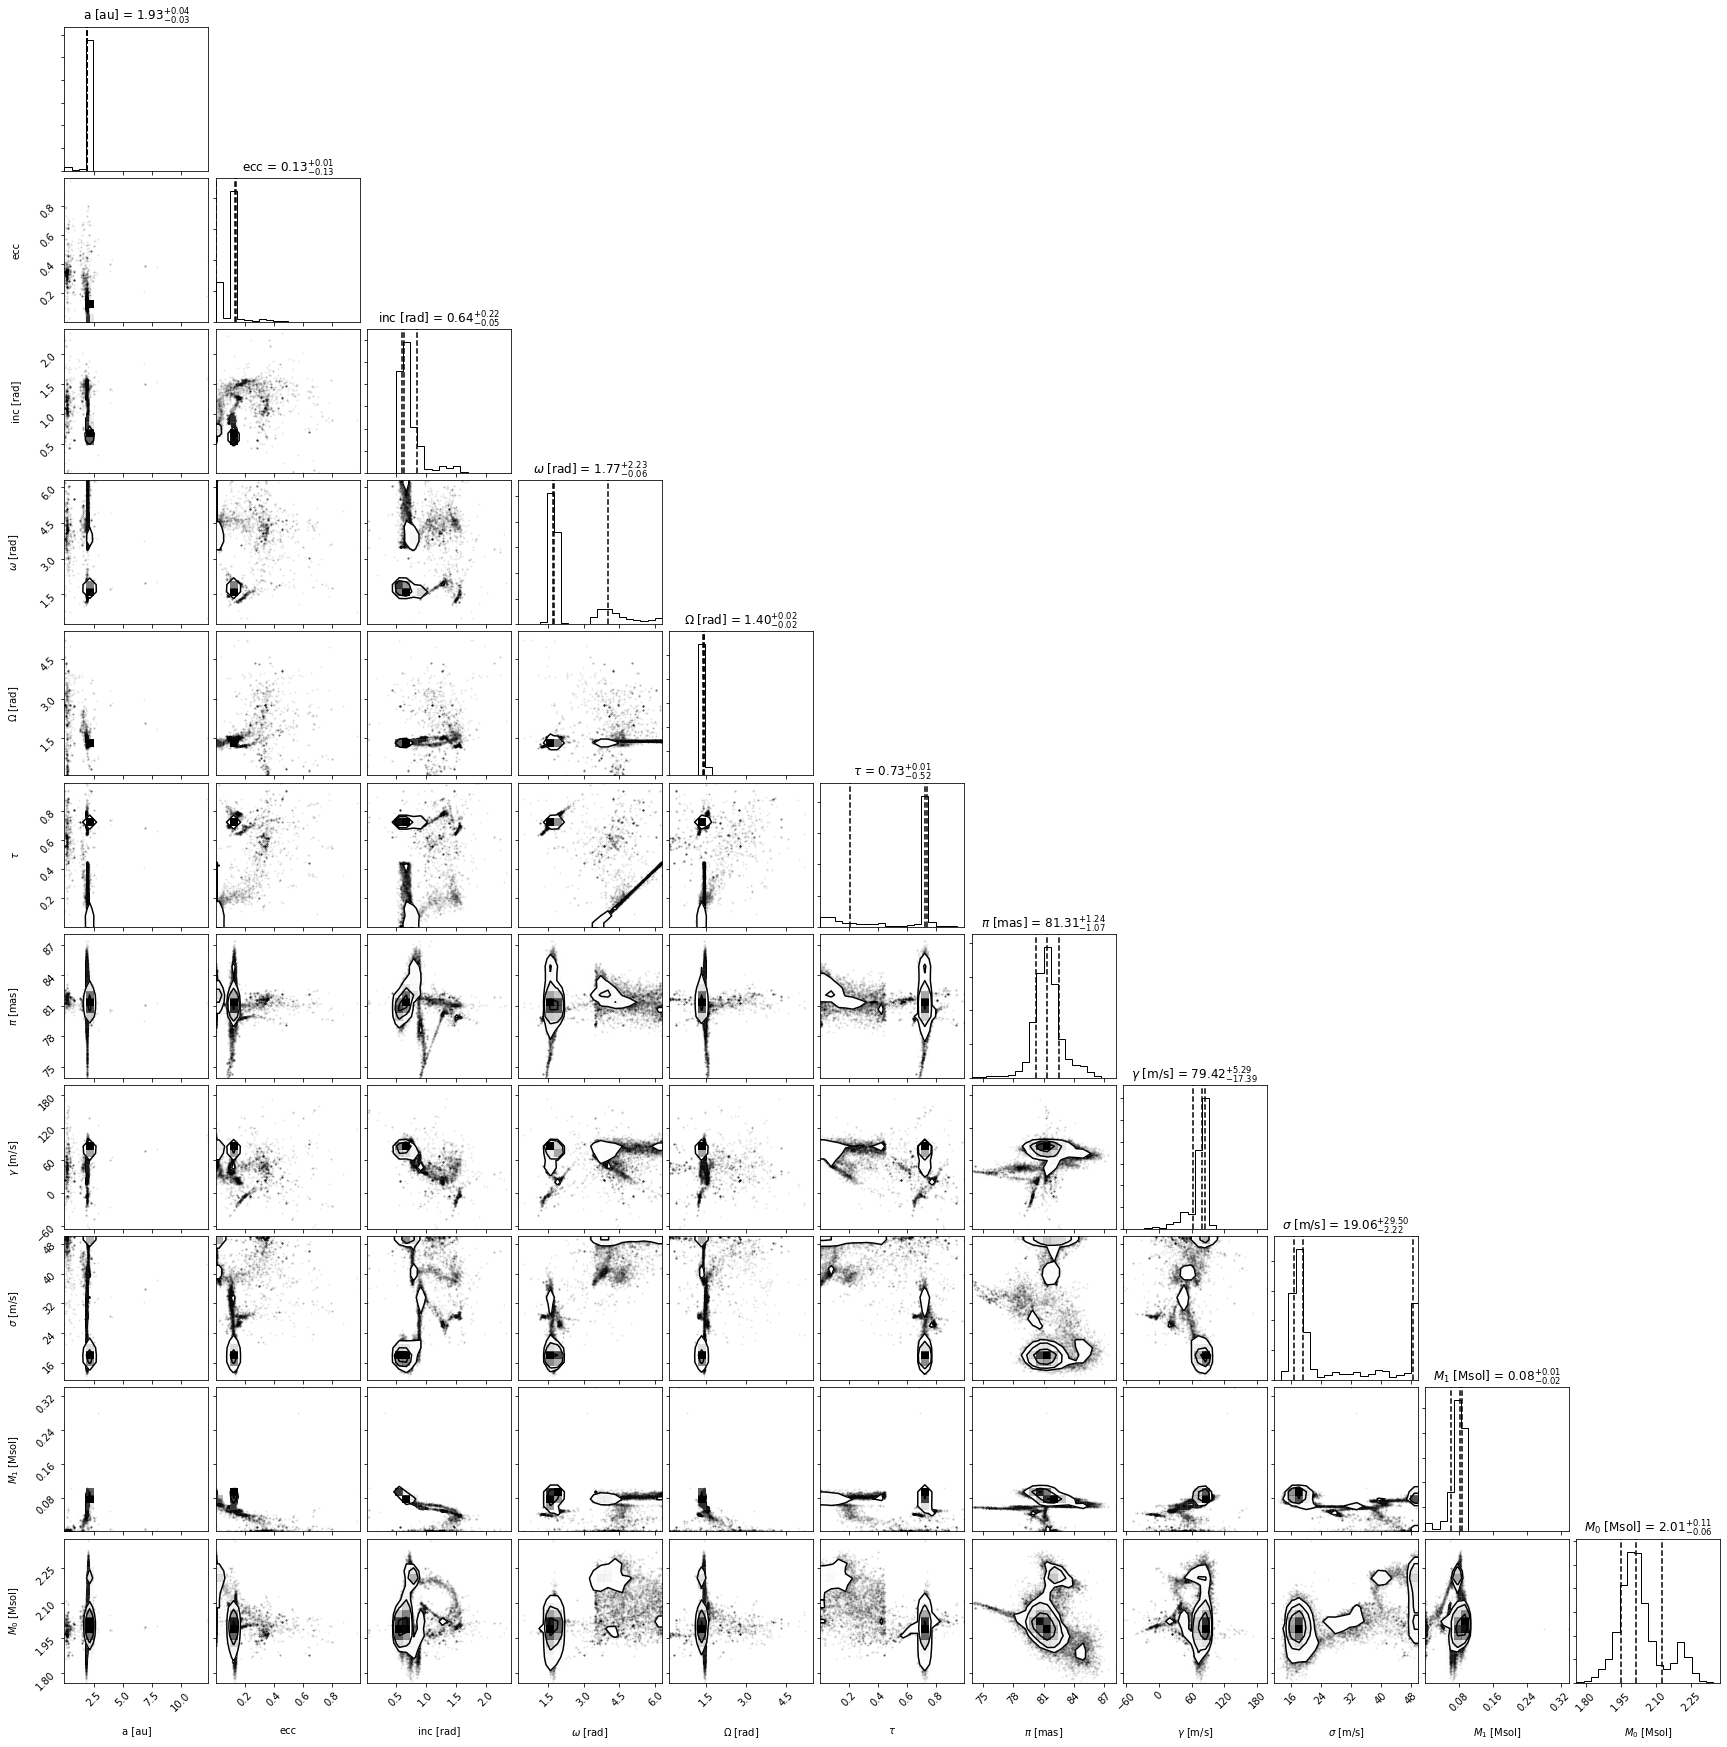

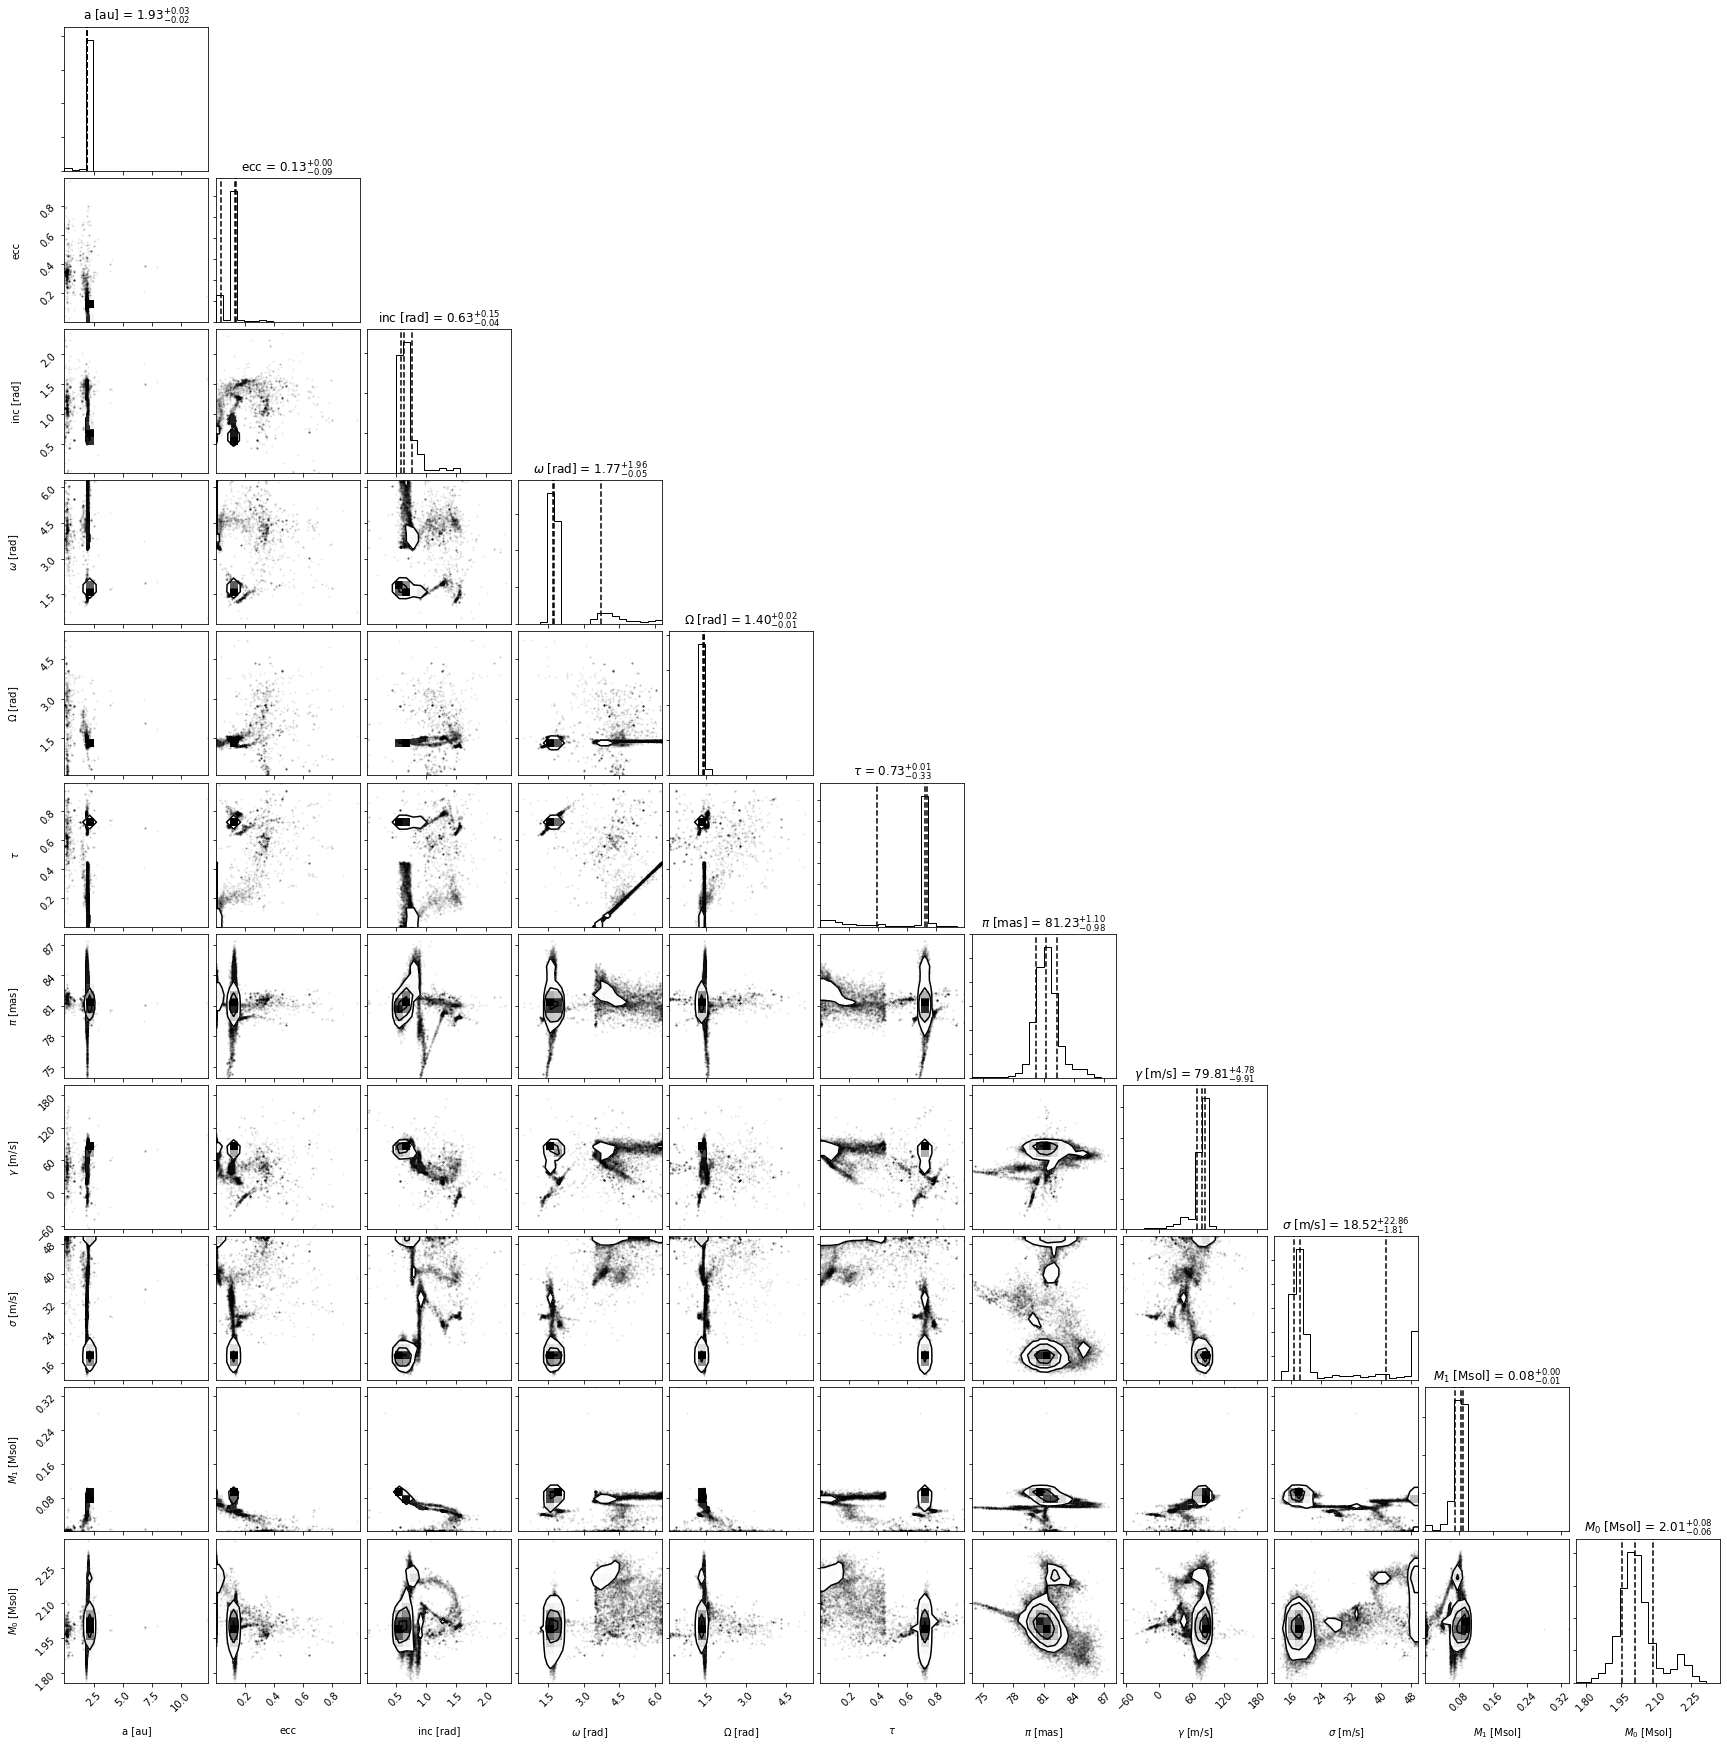

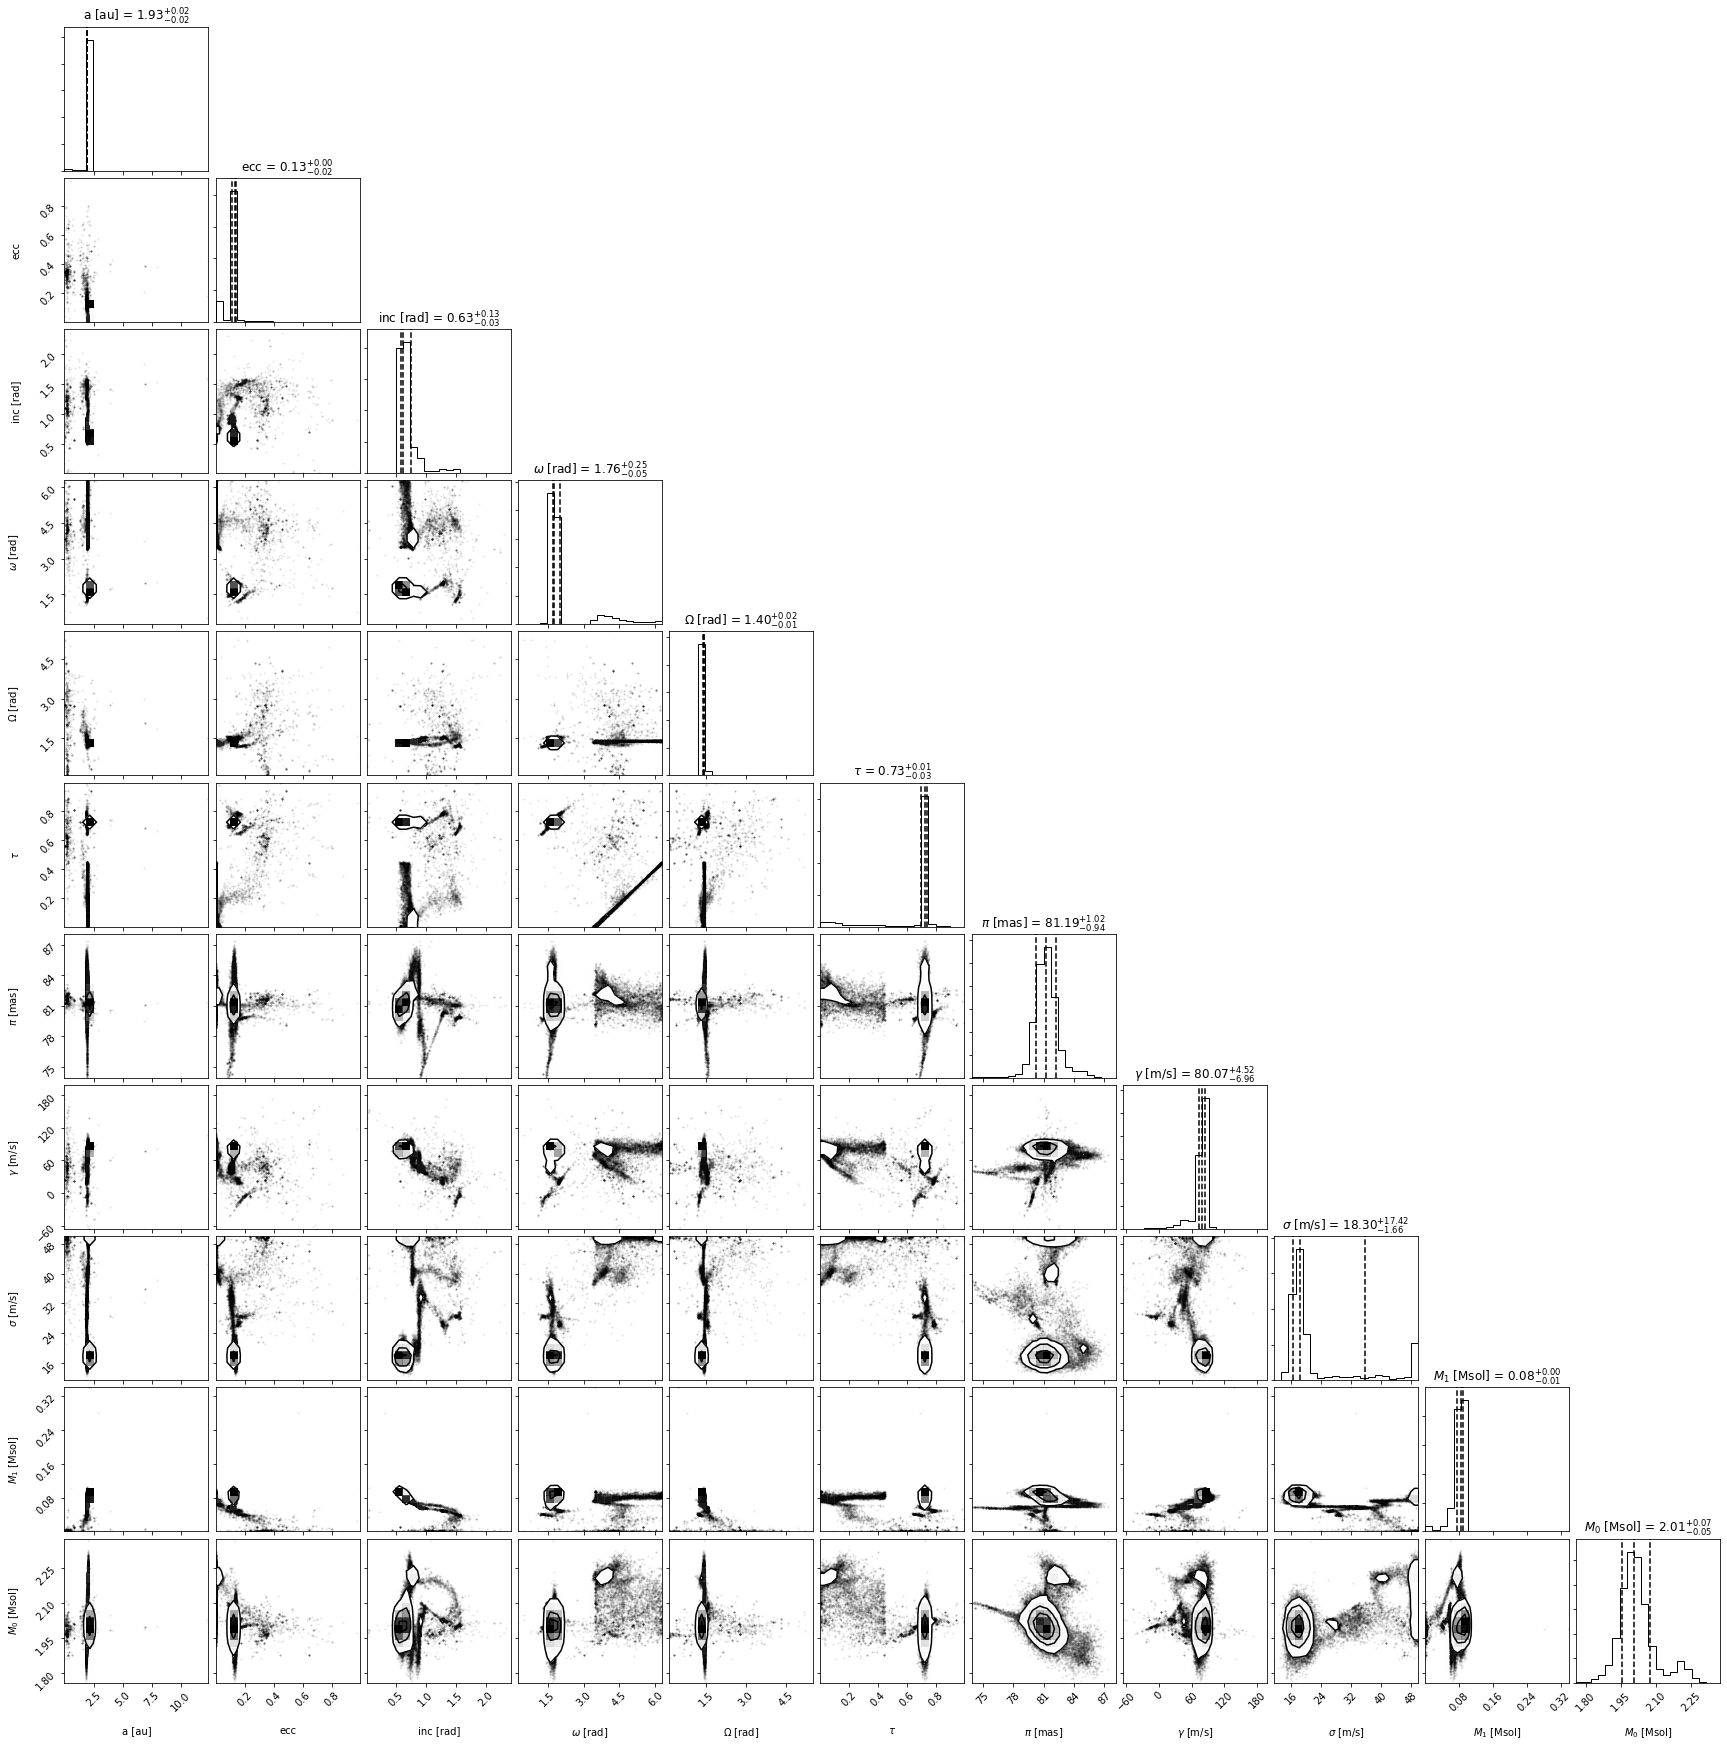

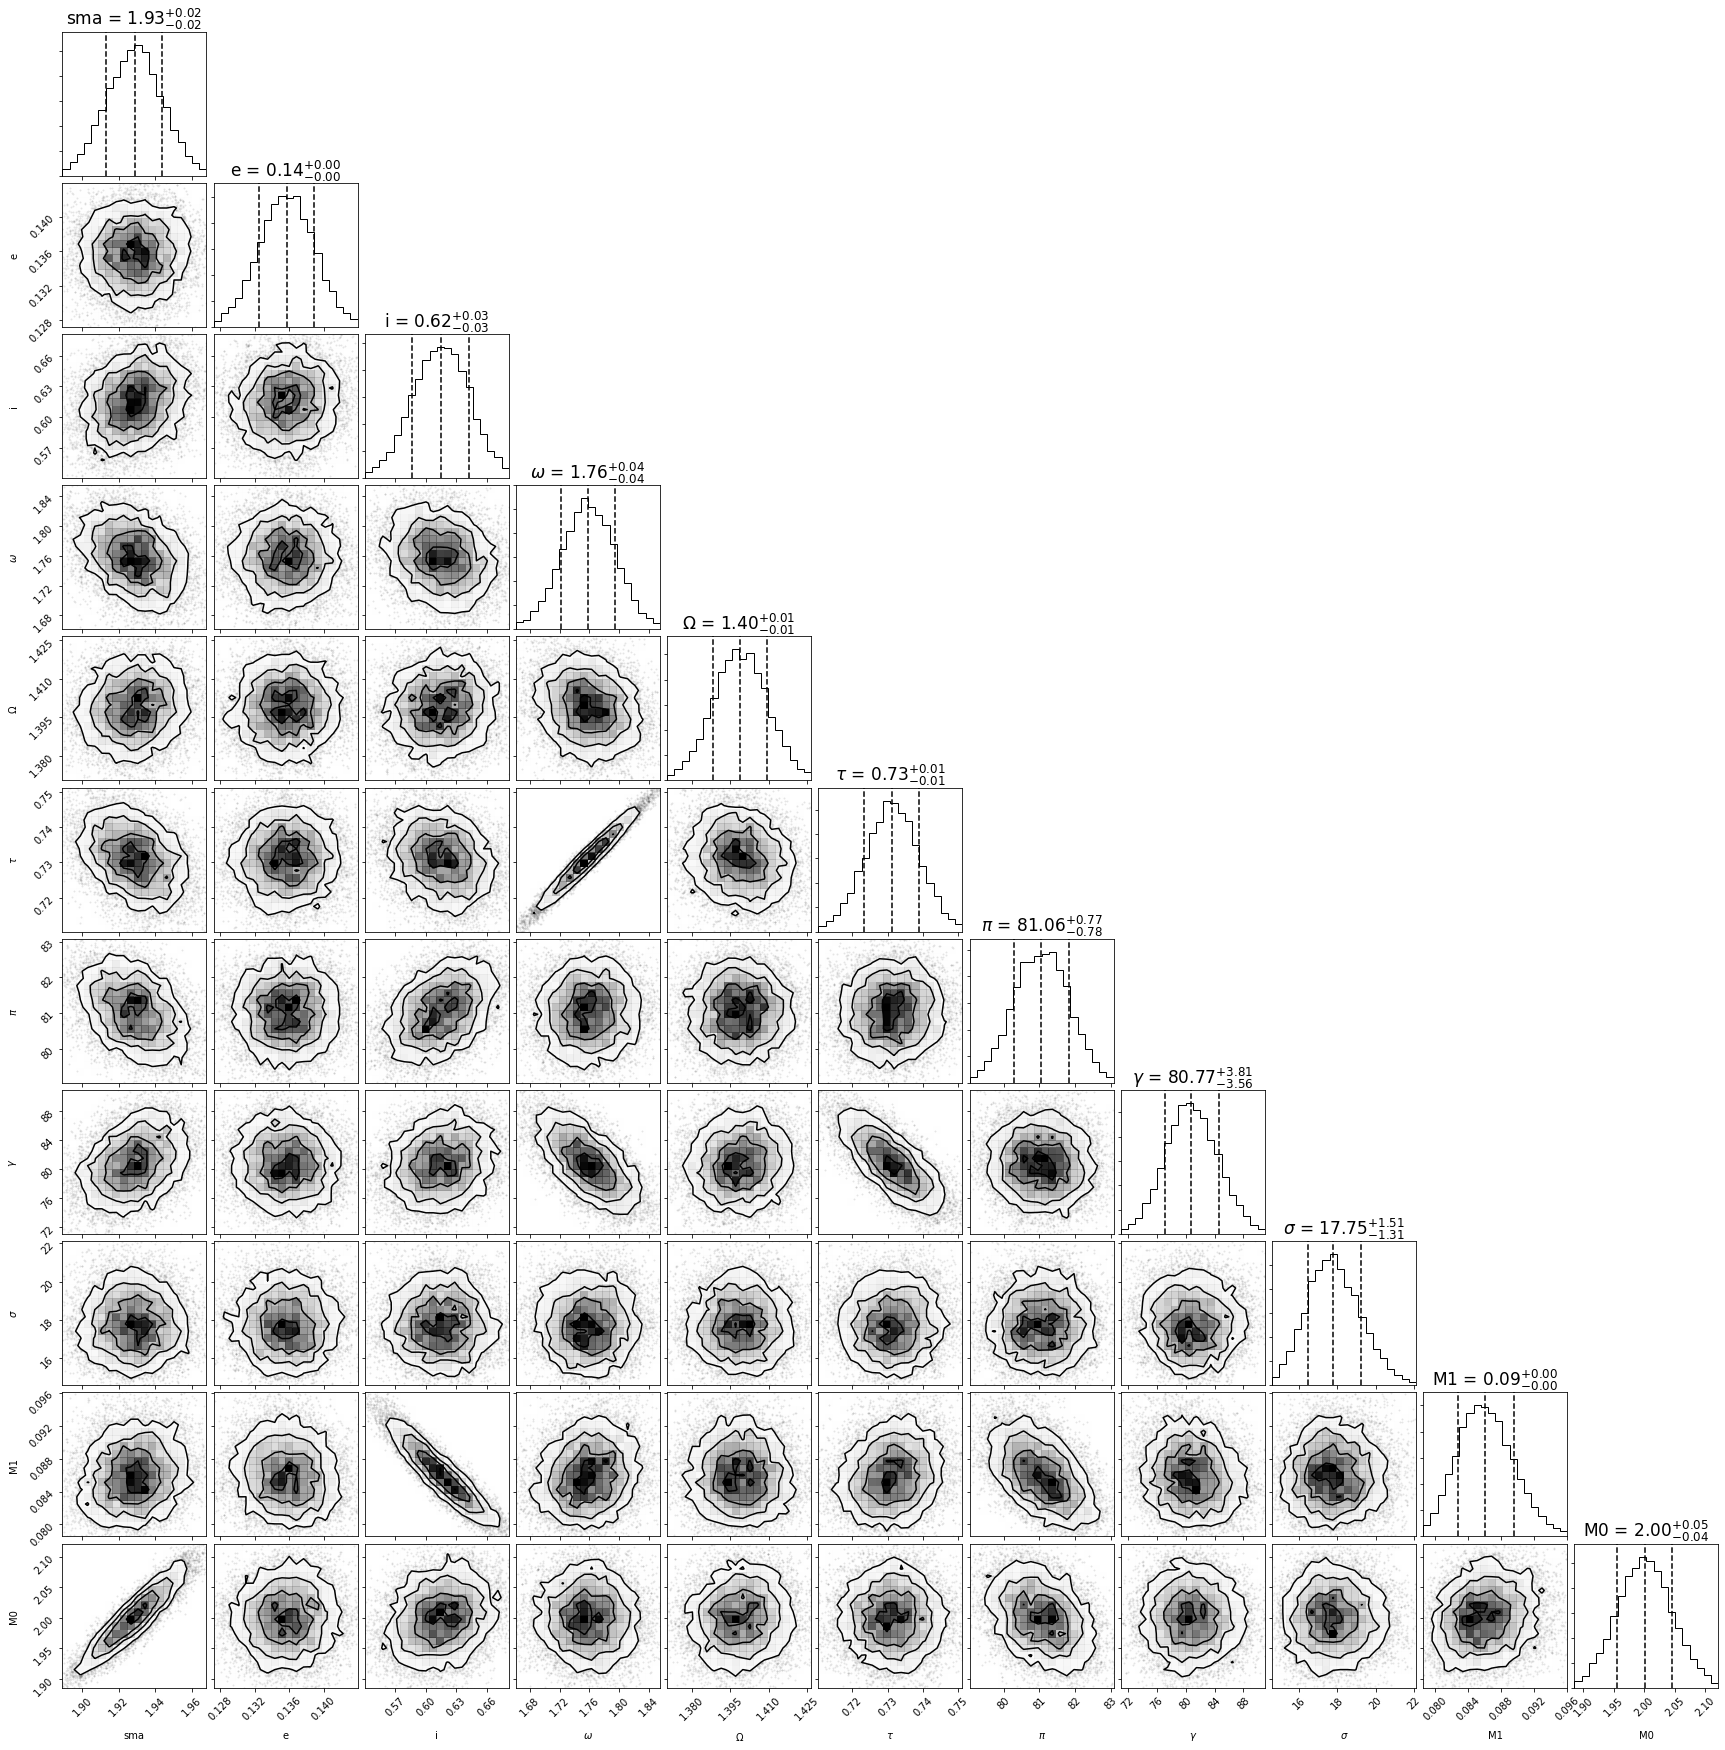

In [6]:
path = '/Users/rtejada/Desktop/orbitize_mcmc/'
param_names = ['sma','e','i','$\omega$','$\Omega$','$\\tau$','$\pi$','$\gamma$','$\sigma$','M1','M0']
for i in range(5):
    #running the sampler:
    myDriver.sampler.run_sampler(total_orbits, burn_steps=0, thin=thin)
    chain = myDriver.sampler.chain
    print(np.shape(chain))
    #saving each sampler chainL
    pkl_file = open(path + 'testdata2_mcmcchains_run%1d.txt' % i,'wb')
    pickle.dump(chain,pkl_file)
    
    #plotting and saving corner plots per each 30k steps:
    corner_plot_fig = myDriver.sampler.results.plot_corner(show_titles=True,
                                     quantiles=[0.16,0.5,0.84]) # Creates a corner plot and returns Figure object
    corner_plot_fig.savefig(path + 'testdata2_cornerplot%1d.pdf' % i)
    
    for j in range(15):
        with PdfPages(path+'walkers_testdata2_mcmc%1d_temps%1d.pdf' % (i,j)) as pdf:
            shape = np.shape(chain)
            num_steps = shape[2]
            num_params = shape[3]
            num_walkers = shape[1]
            for p in range(num_params):
                pname = param_names[p]
                fig = plt.figure(figsize = (8,5))
                for x in range(num_walkers):
                    plt.plot(range(num_steps),myDriver.sampler.chain[j,x,:,p],alpha=0.7,linewidth=2) #makes trend plot trend
                    #plt.axhline(params_list.loc[p],ls='--',c='k')
                plt.ylabel(pname)
                plt.xlabel('steps')
                plt.minorticks_on()
                pdf.savefig()
                #plt.show()
                plt.close()
                

flatchain = np.reshape(chain[0],(-1,11))
corner_fig = corner.corner(flatchain,labels = param_names,quantiles=[0.16,0.5,0.84],
                          show_titles=True,range=np.ones(len(param_names))*0.99,title_kwargs={"fontsize": 17})
corner_fig.savefig(path + 'testdata2_flatchain_cornerplot3.pdf')

In [ ]:
flatchain = np.reshape(chain[0],(-1,11))

In [ ]:
np.shape(flatchain)

In [ ]:
param_names = ['sma','e','i','$\omega$','$\Omega$','$\\tau$','$\pi$','$\gamma$','$\sigma$','M1','M0']

In [ ]:
print(param_names)

In [ ]:
corner_fig = corner.corner(flatchain,labels = param_names,quantiles=[0.16,0.5,0.84],
                          show_titles=True,range=np.ones(len(param_names))*0.99,title_kwargs={"fontsize": 17})
corner_fig.savefig(path + 'testdata1_flatchain_cornerplot3.pdf')

In [ ]:
np.shape(myDriver.sampler.results.post[:,0])

In [ ]:
plt.plot(range(40000),myDriver.sampler.results.lnlike)

In [ ]:
for i in range(15):
    with PdfPages(path+'walkers_testdata0_temps%1d.pdf' % i) as pdf:
        shape = np.shape(chain)
        num_steps = shape[2]
        num_params = shape[3]
        num_walkers = shape[1]
        for p in range(num_params):
            pname = param_names[p]
            fig = plt.figure(figsize = (8,5))
            for x in range(num_walkers):
                plt.plot(range(num_steps),myDriver.sampler.chain[i,x,:,p],alpha=0.7,linewidth=2) #makes trend plot trend
                #plt.axhline(params_list.loc[p],ls='--',c='k')
            plt.ylabel(pname)
            plt.xlabel('steps')
            plt.minorticks_on()
            pdf.savefig()
            #plt.show()
            plt.close()